# Sparks Foundation GRIP - Data Science and Business Analytics
## Task 1 - Prediction using Supervised ML
### Liam O'Neill
<br/><br/>
The task is to predict a student's score based upon the number of hours they study. We will accomplish this by training a model and use it to predict the score of a student who studies for 9.25 hours per day. The data set has been provided for us and contains a .csv file with the number of hours a student has studied and their score.
<br/><br/>
First, we are going to start by importing all of the libraries we will need to use in this notebook:

In [1]:
#Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline

## Importing and Inspecting the Data
Now that we have imported the libraries which I will be using, we'll start by importing the csv file at the link provided, and using the pandas <b>.read_csv()</b> function to create a data frame called "study_scores" with the data from the csv file:

In [2]:
#Get Data from link using pandas read_csv and display
link = "http://bit.ly/w-data"
study_scores = pd.read_csv(link)
study_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
study_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Displayed above is the head of a data frame (first 5 rows) which shows that the import was done properly, as well as information about the data frame including the number of row, data types, on-and how many non-null values there are.
<br></br>
With this information, we can easily determine that due to the lack of null values, the small size of the data set, and that the values look like they match what we are looking for, no data cleaning needs to be done on this data set.
<br></br>
The next step from here is to inspect the data using pandas <b>.describe()</b>:

In [4]:
study_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In addition to some basic information about the data set, we can use pyplot's <b>.plot()</b> function to plot the data to inspect the general relationship between the variables visually:

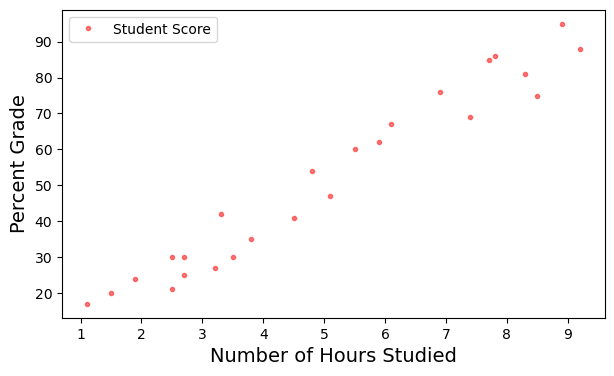

In [5]:
#Plot data to visually inspect it
study_scores.plot(x = 'Hours', y = 'Scores', label = 'Student Score', style = '.', color = 'r', figsize = (7,4), alpha = 0.5)   
plt.xlabel('Number of Hours Studied', fontsize = 14)  
plt.ylabel('Percent Grade', fontsize = 14)
plt.show()

We can see from the plot above that there is a positive linear relationship between the number of hours studied and the grade received, which further reinforces that this prediction can be made using linear regression.
## Splitting the Data Into a Training and Testing Set
Before training a linear regression model, the data must be split into attributes and labels so that there is a score to predict(response) based on a number of hours studied (feature). This can be done by creating a new variable for each and selecting the column values from the original data frame using the pandas <b>.iloc[]</b> function.
<br></br>
Using these defined attributes/labels as well as scikit-learn's <b>train_test_split()</b> medthod, the data can be split into a training set and a test set, where the model is trained on the training set, and the model is evaluated using the test set.

In [6]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split 

X = study_scores.iloc[:, :-1].values  
y = study_scores.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92) 

<div class="alert alert-block alert-info">
    *test_size determines how much of the data makes up the test set. Test size of 0.2 means that 20% is included in the test set.
</div>

## Training the Model
Now that the training set and test set have been created, the training set can be used to train a linear regression model using scikit-learn's <b>LinearRegression()</b> and <b>.fit()</b>:

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  
model.fit(X_train, y_train)
print("The model's regression coefficient is:", model.coef_, "and the intercept is:", model.intercept_)

The model's regression coefficient is: [9.84502691] and the intercept is: 2.630655770380706


The code ran with no errors, and the model regression coefficient and intercept are displayed by a print statement. We have successfully trained the model.
<br></br>
Using <b>model.coef_</b> and <b>model.intercept_</b> we can get the coefficient and the intercept, which we can then plot along with the data to get a visual representation of the model against the data set:

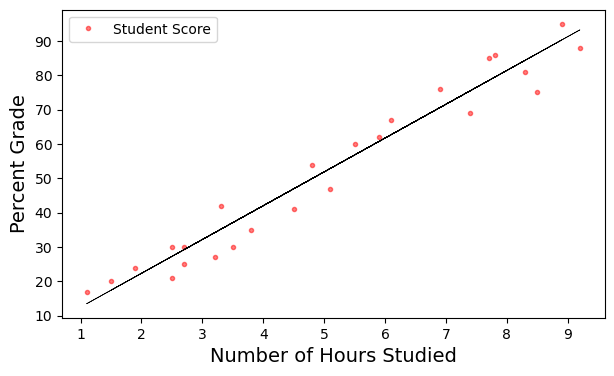

In [8]:
# Plot the regression line on the Data to visualize against the data set
study_scores.plot(x = 'Hours', y = 'Scores', label = 'Student Score', style = '.', color = 'r', figsize = (7,4), alpha = 0.5)
lbf = model.coef_*X+model.intercept_
plt.plot(X, lbf, label = "Regression Model", color = 'black', linewidth = 0.5)
plt.xlabel('Number of Hours Studied', fontsize = 14)  
plt.ylabel('Percent Grade', fontsize = 14)
plt.show()

## Evaluate the Model
Next the trained model can be used to predict some scores from the test set, which can then be compared to the actual values for the given hours studied in the test set:

In [9]:
#Predict scores using trained model on test set
scores_predicted = model.predict(X_test)
scores_predicted

array([29.21222842, 29.21222842, 17.39819613, 40.04175802, 75.48385489])

The output above shows an array with 5 values. These are the predicted scores from the model based on the hours studied included in the test set. This on it's own doesn't tell us much, so it would be more helpful to compare the model's predicted scores to the actual scores from the test set as in the data frame below.

In [10]:
#Compare predicted scores to actual scores from test set
compared = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': scores_predicted})  
compared

,Actual Score,Predicted Score
0,30,29.212228
1,25,29.212228
2,20,17.398196
3,35,40.041758
4,69,75.483855


Above is a data frame containing the actual score from the test set and the corresponding predicted score from the model. Some of these values are very close (Look at the first row, a difference of less than 1%), while some are a little larger (The last row shows a difference of over 6%). The model's performance can be measured using a performance indicator.
<br></br>
For this performance measure, we are going to use the Root Mean Squared Error<b>(RMSE)</b>. To do this we will use scikit-learn's <b>mean_squared_error()</b> from it's metrics module, and then use numpy's <b>np.sqrt()</b> function to find the square root of the mean squared error, giving us the RMSE.

In [11]:
#Evaluate the model using the root mean squared error
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(y_test, scores_predicted)
model_rmse = np.sqrt(model_mse)
print("The model's RSME is", model_rmse)

The model's RSME is 4.303313466317969


## What Would the Predicted Score of a Student Who Studies 9.25 Hours Be?
4.3% could still be an acceptable range of error for these values, so finally the model can be used to predict a score based on new data. The original task is to predict the score of a student who studies for 9.25 hours.

In [12]:
#Make prediction for 9.25 study hours
hours_studied = [[9.25]]
answer = model.predict(hours_studied)
print("For a student who studies 9.25 hours, the model's predicted score is {}".format(answer[0]))

For a student who studies 9.25 hours, the model's predicted score is 93.69715467410802
